## 6.4 Machine Learning Part 1

### This script contains the following:

#### Step 2 - Import libraries and data
#### Step 3 - Clean data
#### Step 4 - Explore relationship between variables
#### Step 5 - Hypothesis
#### Step 6 - Reshape variables into NumPy arrays
#### Step 7 - Split data into training and test sets
#### Step 8 - Run a linear regression on the data
#### Step 9 - Create a plot that shows the regression line on the test data
#### Step 10 - Interpretation of how well the line appears to fit the data
#### Step 11 - Check the model performance statistics
#### Step 12 - Compare the predicted y values with the actual y values
#### Step 13 - Thoughts on model performance on the test set

### Step 2 - Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FHL_bank_data_borr1_clean.pkl'))

### Step 3 - Clean data

In [5]:
df.columns

Index(['County', 'State', 'Year', 'LoanCharacteristicsID',
       'Total Monthly Income Amount', 'Borrower 1 Age', 'Borrower 1 Race',
       'Borrower 1 Gender', 'Borrower 1 Credit Score Value',
       'Property Unit Count', 'Note Rate Percent', 'Note Amount',
       'Total Debt Expense Ratio Percent', 'Loan Purpose', 'Mortgage Type',
       'First Time Homebuyer', 'Property Usage', 'Property Type', 'Loan Count',
       'Borrower Count', 'Total Loan Count per State',
       'Max Note Amount per State'],
      dtype='object')

In [6]:
df.head(20)

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Borrower 1 Age,Borrower 1 Race,Borrower 1 Gender,Borrower 1 Credit Score Value,Property Unit Count,...,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State
0,Chittenden,Vermont,2019,2407198,7308,34.0,White,Female,1,1,...,40.46,Purchase,FHA,Yes,Principal Residence,Single family detached,1,1,332,547560
1,Chittenden,Vermont,2019,2407199,7416,36.0,White,Female,3,1,...,45.67,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
2,Lamoille,Vermont,2019,2407200,5143,34.0,White,Male,2,1,...,46.23,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
3,Orange,Vermont,2019,2407201,8866,42.0,White,Male,4,1,...,36.88,Purchase,VA,No,Principal Residence,Single family detached,1,2,332,547560
4,York,Maine,2019,2407202,15240,66.0,White,Female,5,1,...,34.95,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1,229,575000
5,York,Maine,2019,2407203,5424,23.0,White,Male,3,1,...,42.04,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,2,229,575000
6,Middlesex,Massachusetts,2019,2407205,10165,48.0,White,Female,5,1,...,39.82,Purchase,Conventional,Yes,Principal Residence,Low-rise condo,1,1,1441,828700
7,Plymouth,Massachusetts,2019,2407208,9678,33.0,White,Male,3,1,...,34.49,Purchase,Conventional,No,Principal Residence,Low-rise condo,1,2,1441,828700
8,Norfolk,Massachusetts,2019,2407209,7565,30.0,White,Male,5,1,...,43.24,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,3,1441,828700
9,Norfolk,Massachusetts,2019,2407210,11416,44.0,White,Female,5,1,...,39.57,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,2,1441,828700


In [7]:
df.shape

(101202, 22)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

County                              0
State                               0
Year                                0
LoanCharacteristicsID               0
Total Monthly Income Amount         0
Borrower 1 Age                      0
Borrower 1 Race                     0
Borrower 1 Gender                   0
Borrower 1 Credit Score Value       0
Property Unit Count                 0
Note Rate Percent                   0
Note Amount                         0
Total Debt Expense Ratio Percent    0
Loan Purpose                        0
Mortgage Type                       0
First Time Homebuyer                0
Property Usage                      0
Property Type                       0
Loan Count                          0
Borrower Count                      0
Total Loan Count per State          0
Max Note Amount per State           0
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(101202,)

##### Extreme values checks

C:\Users\jomok\AppData\Local\Temp\ipykernel_20048\913590365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Note Amount'], bins=25) # Shows extreme values


<Axes: xlabel='Note Amount', ylabel='Density'>

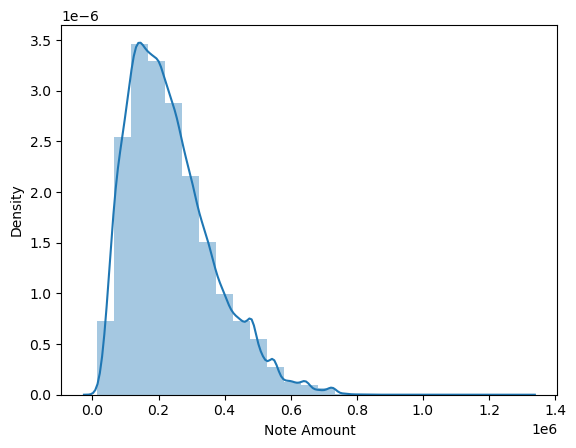

In [11]:
sns.distplot(df['Note Amount'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['Note Amount'].mean() # Check the mean

236712.70407699453

In [13]:
df['Note Amount'].median() # Check the median

213600.0

In [14]:
df['Note Amount'].max() # Check the max

1300000

### Step 4 - Visually explore relationship between variables

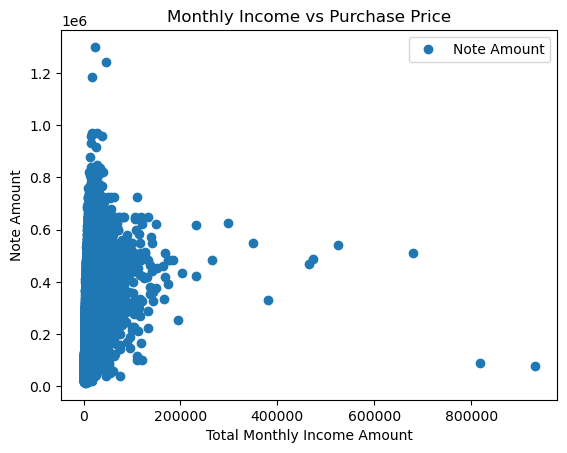

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total Monthly Income Amount', y='Note Amount',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Monthly Income vs Purchase Price') 
plt.xlabel('Total Monthly Income Amount')  
plt.ylabel('Note Amount')  
plt.show()

In [16]:
# Clean the extreme values from the "Total Monthly Income" variables.

df_test = df[df['Total Monthly Income Amount'] <=150000] 

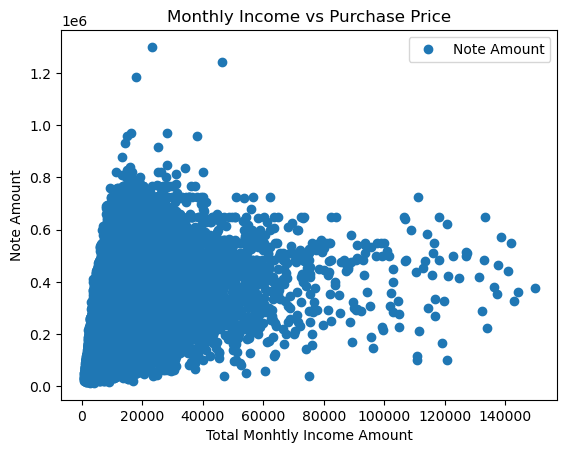

In [17]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Total Monthly Income Amount', y='Note Amount', style='o')  
plt.title('Monthly Income vs Purchase Price')  
plt.xlabel('Total Monhtly Income Amount')  
plt.ylabel('Note Amount')  
plt.show()

In [18]:
# Reshape.

X_2 = df_test['Total Monthly Income Amount'].values.reshape(-1,1)
y_2 = df_test['Note Amount'].values.reshape(-1,1)

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [20]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [21]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [22]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.21772404]]
Mean squared error:  11995908132.238981
R2 score:  0.27746224345948356


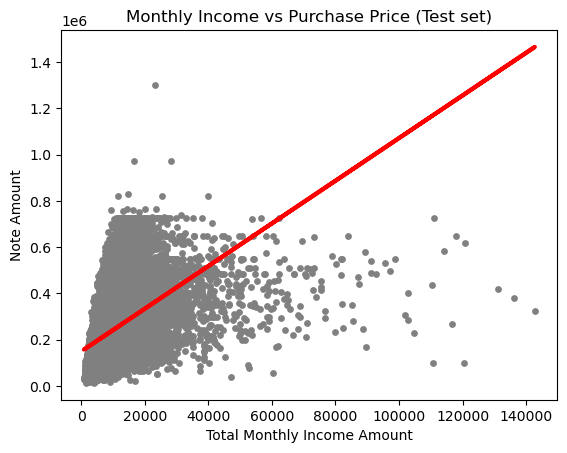

In [24]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Monthly Income vs Purchase Price (Test set)')
plot_test.xlabel('Total Monthly Income Amount')
plot_test.ylabel('Note Amount')
plot_test.show()

In [25]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,424000,266712.290772
1,216600,235703.867091
2,249750,261854.550201
3,400000,237298.533351
4,312000,290134.527565
5,96000,185467.271057
6,236000,210336.690525
7,272832,202114.480679
8,268000,238229.523479
9,346750,230071.837701


### Step 5 - Hypothesis:  The more spending power that the borrower has, the more they will spend to purchase a home.



### Step 6 - Reshape variables into NumPy arrays

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_test['Total Monthly Income Amount'].values.reshape(-1,1)
y = df_test['Note Amount'].values.reshape(-1,1)

In [27]:
X

array([[ 7308],
       [ 7416],
       [ 5143],
       ...,
       [ 9475],
       [43000],
       [ 6086]], dtype=int64)

In [28]:
y

array([[319113],
       [248005],
       [211105],
       ...,
       [386500],
       [385500],
       [237000]], dtype=int64)

### Step 7 - Split the data into training and test set

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 8 - Run a linear regression on the data

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Step 9 - Create a plot that shows the regression line on the test data

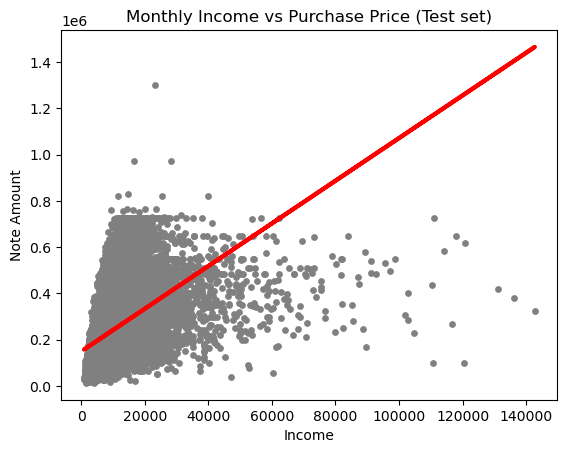

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Monthly Income vs Purchase Price (Test set)')
plot_test.xlabel('Income')
plot_test.ylabel('Note Amount')
plot_test.show()

Interpretation of how well the line appears to fit the data in a markdown cell:



### Step 11 - Check the model performance statistics

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.21772404]]
Mean squared error:  11995908132.238981
R2 score:  0.27746224345948356


### Step 12 - Compare the predicted y values with the actual y values

In [36]:
y_predicted

array([[266712.29077196],
       [235703.86709138],
       [261854.55020131],
       ...,
       [194804.8255127 ],
       [190371.10024803],
       [206391.50463472]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,424000,266712.290772
1,216600,235703.867091
2,249750,261854.550201
3,400000,237298.533351
4,312000,290134.527565
5,96000,185467.271057
6,236000,210336.690525
7,272832,202114.480679
8,268000,238229.523479
9,346750,230071.837701


##### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.21772404]]
Mean squared error:  11917740892.727257
R2 score:  0.279481623440231


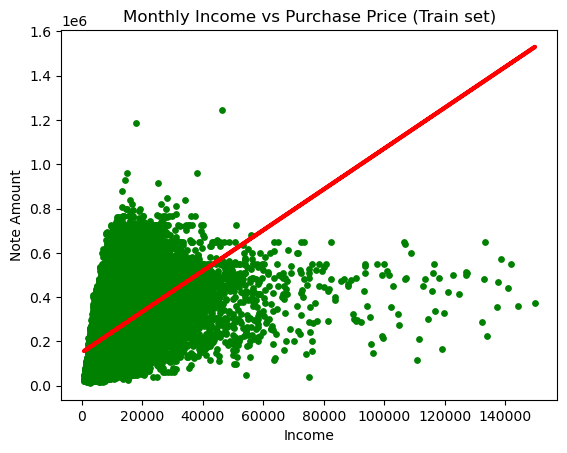

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Monthly Income vs Purchase Price (Train set)')
plot_test.xlabel('Income')
plot_test.ylabel('Note Amount')
plot_test.show()

### Step 13 - Thoughts on model performance on the test set

The red regression line does not perfectly cover many of the data points
In areas where Monthly Income is higher, the note amount is actually lower, which contradicts my hypothesis
The slope value of 9.21772404 is a high positive, indicating a positive relationship:  as Monthly Income rises by a significant amount, so do Note Amounts.
The root mean squared error (MSE) is extremely large at 11917740892.727257, indicating that the regression line is extremely far away from the data points and that the regression line is definitely not an accurate representation of the data, and cannot accurately predict the influence of Monthly Income Amount on the Note Amount.
The R2 score is 0.279481623440231, which is closer to 0 than 1, indicating that the model is not a good fit.
The physical check of the real vs. the predicted values o f y shows large differences between the actual and predicted y values, and adds evidence to the fact that the model is not going a great job of explaining the relationship between the "Total Monthly Income Amount" and "Note Amount" variables.
The relationship does not follow a single, straight regression line, and so a single, straight regression line will not be able to accurately predict anything.
The model fits the training set only slightly better than the test set, indicating that there is no overfitting of the model, but also confirms that the relationship between the two variables is not purely linear.


Any reflections on the impact of possible data bias:  There may be collection bias in this data set as I am not sure of the accuracy of the data collection process.